In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam_made_by_hetvi.csv")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5627, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Data Preprocessing
# 4. Model Building
# 5. Evaluation
# 6.Improvement
# 7. Website
# 8. Deploy

# 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5627 entries, 0 to 5626
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5627 non-null   object
 1   v2          5627 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 219.9+ KB


In [7]:
# drop last 3 cols
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# remaning the column name
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df["target"] = encoder.fit_transform(df["target"])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

453

In [116]:
# remove duplicates
df = df.drop_duplicates(keep = "first")

In [117]:
df.shape

(5169, 2)

# 2. EDA

In [118]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

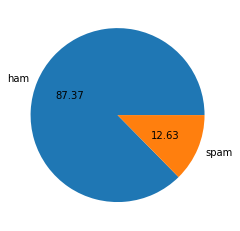

In [120]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [121]:
# Data is imbalanced

In [122]:
import nltk

In [123]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [124]:
df["num_characters"] = df["text"].apply(len) # length of each msg in terms of characters used in it

In [125]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [126]:
# num of words
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [127]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [128]:
# num of sentences
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [129]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [130]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [131]:
# ham msges
df[df["target"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [132]:
# spam msges
df[df["target"] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [133]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

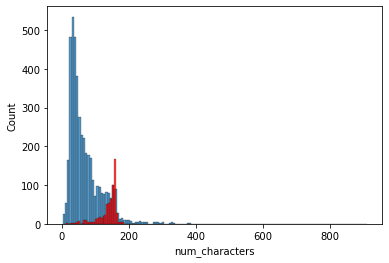

In [134]:
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"],color="r")

<AxesSubplot:xlabel='num_words', ylabel='Count'>

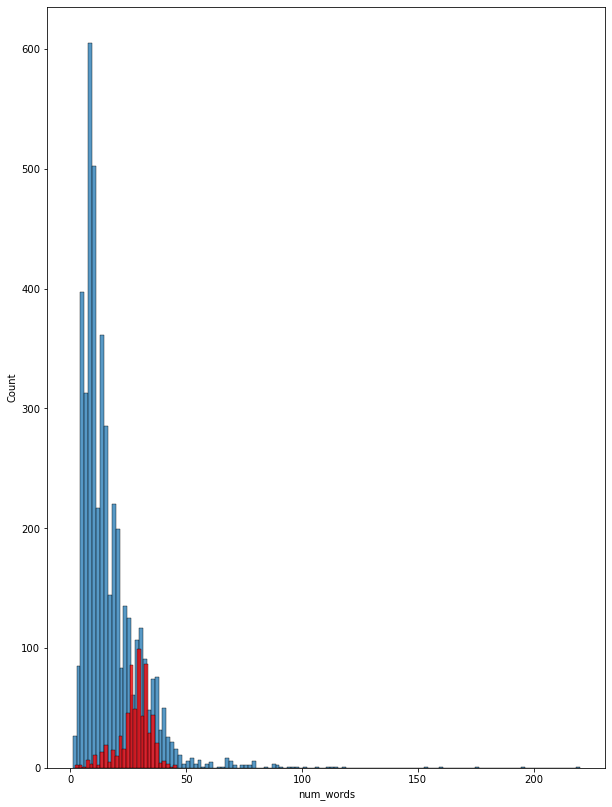

In [135]:
plt.figure(figsize=(10,14))
sns.histplot(df[df["target"] == 0]["num_words"])
sns.histplot(df[df["target"] == 1]["num_words"],color="r")

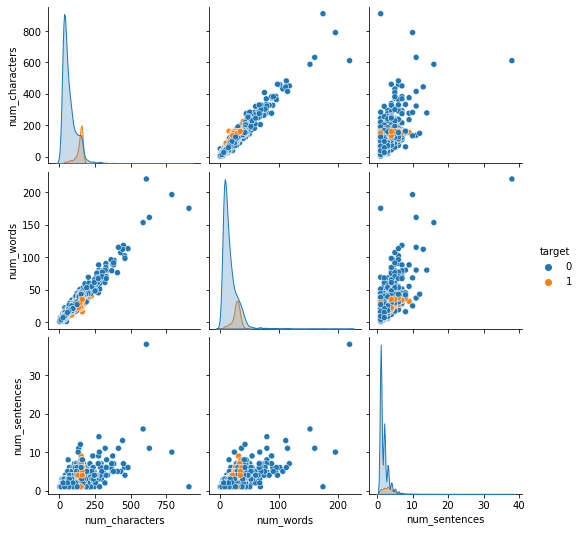

In [136]:
sns.pairplot(df,hue="target")

In [137]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262969,0.267602
num_characters,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sentences,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

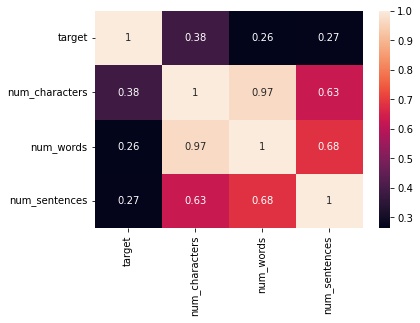

In [138]:
sns.heatmap(df.corr(),annot=True)

#  3. Data Preprocessing
#### lower case
#### Tokenization
#### Removing special characters
#### Removing stop words and punctuations
#### Stemming

In [139]:
# stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [140]:
# punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [141]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [142]:
ps.stem("eating")

'eat'

In [143]:
ps.stem("dancing")

'danc'

In [144]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
          y.append(i)
        
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation :
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [145]:
transform_text("HI HOW ARE YOU HETVI h@ ?@h@?") # how are you are stop words

'hi hetvi h h'

In [146]:
transform_text("Did you liked my presentation on ML?")  # only imp and uique words are coming as o/p

'like present ml'

In [147]:
transform_text("I am really loving the book u gave me to read and i am reading it daily") 

'realli love book u gave read read daili'

In [148]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [149]:
transform_text(df["text"][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [150]:
df["transformed_text"] = df["text"].apply(transform_text)

In [151]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [152]:
!pip install wordcloud

In [153]:
# word cloud of spam and ham msges (that are fequently used in spam and ham respectively)
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color="white")

In [154]:
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

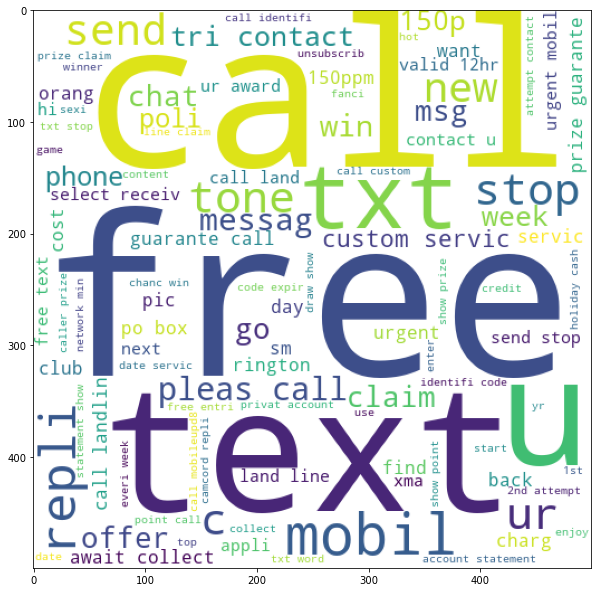

In [155]:
plt.figure(figsize=(10,14))
plt.imshow(spam_wc)

In [156]:
ham_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

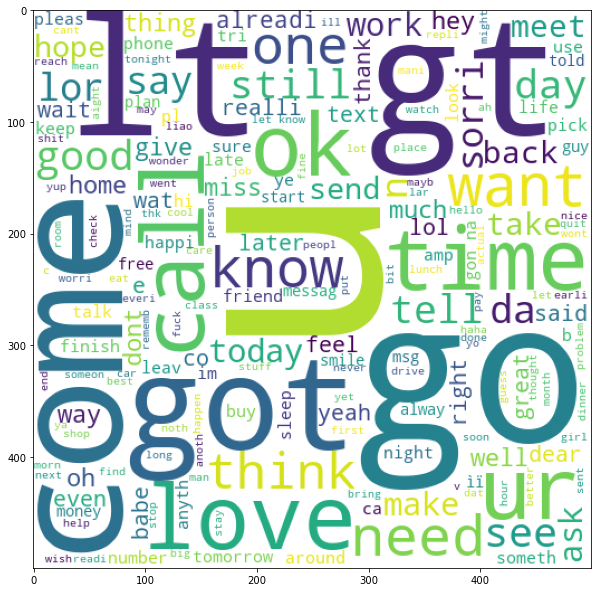

In [157]:
plt.figure(figsize=(10,14))
plt.imshow(ham_wc)

In [158]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [159]:
df[df["target"]==1]["transformed_text"].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [160]:
for msg in df[df["target"]==1]["transformed_text"].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [161]:
spam_corpus = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [162]:
len(spam_corpus)

9939

In [163]:
from collections import Counter

Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

D:\Final_Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

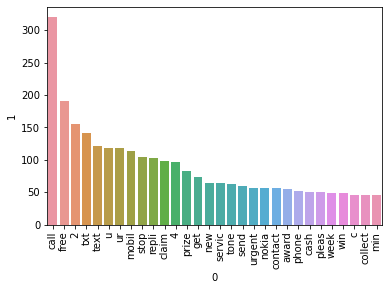

In [164]:
plt.xticks(rotation="vertical")
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

In [165]:
ham_corpus = []
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [166]:
len(ham_corpus)

35402

D:\Final_Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

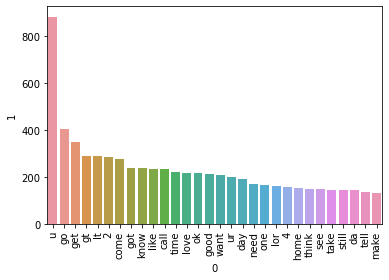

In [167]:
plt.xticks(rotation="vertical")
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

# 4. Model Building

In [168]:
# naive bayes performs best on textual data 

In [169]:
# BagOfWords using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [170]:
X = cv.fit_transform(df["transformed_text"]).toarray()

In [171]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [172]:
X.shape

(5169, 6708)

In [173]:
y = df["target"].values


In [174]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [177]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [178]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [179]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [180]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [181]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [182]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [183]:
X2 = tfidf.fit_transform(df["transformed_text"]).toarray()

In [184]:
X2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [185]:
X2.shape

(5169, 6708)

In [186]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [187]:
y2 = df["target"].values

In [188]:
y2

array([0, 0, 1, ..., 0, 0, 0])

In [189]:
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=2)

In [190]:
# on tfidf
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [191]:
# on tfidf                                  here data is imbalanced so "accuracy" thi vadhare "precision" matter kare!!!
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [192]:
# on tfidf
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [193]:
# so we chose tfidf and mnb

In [94]:
# lets try other ml algos as well

In [200]:
# from sklearn.linear_model import LogisticRegression

# from sklearn.svm import SVC

# from sklearn.naive_bayes import MultinomialNB

# from sklearn.tree import DecisionTreeClassifier

# from sklearn.neighbors import KNeighborsClassifier

# from sklearn.ensemble import RandomForestClassifier

# from sklearn.ensemble import AdaBoostClassifier

# from sklearn.ensemble import BaggingClassifier

# from sklearn.ensemble import ExtraTreesClassifier

# from sklearn.ensemble import GradientBoostingClassifier

# from xgboost import XGBClassifier

In [96]:
# svc = SVC(kernel='sigmoid', gamma=1.0)

# knc = KNeighborsClassifier()

# mnb = MultinomialNB()

# dtc = DecisionTreeClassifier(max_depth=5)

# lrc = LogisticRegression(solver="liblinear", penalty="l1")

# rfc = RandomForestClassifier(n_estimators=50, random_state=2)

# abc = AdaBoostClassifier(n_estimators=50, random_state=2) 

# bc = BaggingClassifier(n_estimators=50, random_state=2)

# etc = ExtraTreesClassifier (n_estimators=50, random_state=2)

# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2) 

# xgb = XGBClassifier(n_estimators=50, random_state=2)

In [97]:
# clfs ={
# "SVC" : svc,

# "KN" : knc,

# "NB" : mnb,

# "DT": dtc,

# "LR" : lrc,

# 'RF' : rfc,

# "AdaBoost" : abc,

#  "BgC" : bc,

#  "ETC" : etc, 
    
#  "GBDT" : gbdt,

# 'xgb':xgb
# }

In [98]:
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
#     return accuracy, precision

In [ ]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
# accuracy_scores = [] 
# precision_scores = []

# for name,clf in clfs.items():
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy) 
#     precision_scores.append(current_precision)

In [ ]:
# performance_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values("Precision",ascending=False)

In [ ]:
# performance_df

In [194]:
#changes to get more accuracy and more improvement in model performance
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

 

In [195]:
X2 = tfidf.fit_transform(df["transformed_text"]).toarray()

In [196]:
y2 = df["target"].values

In [197]:
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=2)

In [198]:
# on tfidf                                  here data is imbalanced so "accuracy" thi vadhare "precision" matter kare!!!
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [210]:
# y_pred2[102]

0

In [ ]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
# accuracy_scores = [] 
# precision_scores = []

# for name,clf in clfs.items():
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy) 
#     precision_scores.append(current_precision)

In [201]:
# performance_df1 = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_for_3000_features":accuracy_scores,"Precision_for_3000_features":precision_scores}).sort_values("Precision_for_3000_features",ascending=False)

In [ ]:
# performance_df1

In [ ]:
# performance_df.merge(performance_df1,on="Algorithm")

In [ ]:
#performance_df2 = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_after_scalling":accuracy_scores,"Precision_after_scalling":precision_scores}).sort_values("Precision_after_scalling",ascending=False)

In [ ]:
#performance_df2

In [ ]:
#performance_df.merge(performance_df2,on="Algorithm")

# 6. Imporving the model

In [ ]:
# we did changes and found first one as the best so we will not apply any such change

# Making Pickle files

In [202]:
import pickle

In [203]:
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))